# KELOMPOK 3
Anggota:


  1.   (5311422120) Ardian Banuarta
  2.   (5311422121) Raihan Faiq Mubarak
  3.   (5311422122) Raihan Zaki Rizqulloh
  4.   (5311422123) Fuadissalim  
  5.   (5311422124) Vanissa Aulia Agyani Lathifah



---





---



# Import library

---



In [145]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import plotly.express as px
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 1) Upload File dataset


---



In [146]:
df = pd.read_csv('/content/sample_data/Sensors_data.csv')
df

,Unnamed: 0,_time,Heat_index,Humidity,Temperature
0,0,2022-04-13T21:38:00Z,26.389790,32.400000,26.800000
1,1,2022-04-13T21:39:00Z,26.391128,32.433333,26.800000
2,2,2022-04-13T21:40:00Z,26.377855,32.100000,26.800000
3,3,2022-04-13T21:41:00Z,26.401618,31.916667,26.850000
4,4,2022-04-13T21:42:00Z,26.414282,31.716667,26.883333
...,...,...,...,...,...
385867,385867,2023-01-20T01:12:00Z,20.359950,46.133333,21.000000
385868,385868,2023-01-20T01:13:00Z,20.359080,46.100000,21.000000
385869,385869,2023-01-20T01:14:00Z,20.363430,46.266667,21.000000
385870,385870,2023-01-20T01:15:00Z,20.357340,46.033333,21.000000


# 2) Analisis Data

In [147]:
#mengecek total baris dan kolom
jmlh_baris = df.shape[0]
jmlh_kolom = df.shape[1]

print(f"Jumlah baris: {jmlh_baris}")
print(f"Jumlah kolom: {jmlh_kolom}")


Jumlah baris: 385872
Jumlah kolom: 5


In [148]:
#menghapus kolom yang tidak dibutuhkan
df = df.drop(columns=['Unnamed: 0', '_time'])
df

,Heat_index,Humidity,Temperature
0,26.389790,32.400000,26.800000
1,26.391128,32.433333,26.800000
2,26.377855,32.100000,26.800000
3,26.401618,31.916667,26.850000
4,26.414282,31.716667,26.883333
...,...,...,...
385867,20.359950,46.133333,21.000000
385868,20.359080,46.100000,21.000000
385869,20.363430,46.266667,21.000000
385870,20.357340,46.033333,21.000000


In [149]:
#mengubah huruf pertama pada nama kolom agar huruf kecil
df.columns = df.columns.str.lower()
df

,heat_index,humidity,temperature
0,26.389790,32.400000,26.800000
1,26.391128,32.433333,26.800000
2,26.377855,32.100000,26.800000
3,26.401618,31.916667,26.850000
4,26.414282,31.716667,26.883333
...,...,...,...
385867,20.359950,46.133333,21.000000
385868,20.359080,46.100000,21.000000
385869,20.363430,46.266667,21.000000
385870,20.357340,46.033333,21.000000


In [150]:
#melihat informasi detail pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385872 entries, 0 to 385871
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   heat_index   385872 non-null  float64
 1   humidity     385872 non-null  float64
 2   temperature  385872 non-null  float64
dtypes: float64(3)
memory usage: 8.8 MB


In [151]:
#menampilkan statistik deskriptif pada dataframe
df.describe()

,heat_index,humidity,temperature
count,385872.000000,385872.000000,385872.000000
mean,23.096529,52.172995,23.350587
std,2.657446,11.013673,2.558366
min,15.753450,17.983333,16.400000
25%,21.541057,45.350000,21.733333
50%,23.203913,53.183333,23.366667
75%,25.036140,59.200000,25.200000
max,30.089642,96.300000,29.933333


In [152]:
#menghitung jumlah nilai missing dataframe
df.isnull().sum()

heat_index     0
humidity       0
temperature    0
dtype: int64

# 3) Cleaning Data

In [153]:
#mengecek data duplikasi pada kolom 'heat_index'
df.duplicated('heat_index').sum()

146120

In [154]:
#menghapus data duplikasi di kolom 'heat_index'
df= df.drop_duplicates('heat_index')

In [155]:
#mengecek data duplikasi pada kolom 'humidity'
df.duplicated('humidity').sum()

227950

In [156]:
#mengahpus data duplikasi pada kolom humidity
df= df.drop_duplicates('humidity')

In [157]:
#mengecek data duplikasi pada kolom 'temperature'
df.duplicated('temperature').sum()

10357

In [158]:
#menghapus data duplikasi pada kolom 'temperature'
df= df.drop_duplicates('temperature')

In [159]:
#menampilkan dataframe yang sudah di cleaning
df

,heat_index,humidity,temperature
0,26.389790,32.400000,26.800000
3,26.401618,31.916667,26.850000
4,26.414282,31.716667,26.883333
5,26.378700,31.600000,26.833333
6,26.424605,31.716667,26.900000
...,...,...,...
382055,18.921046,55.060000,19.480000
382669,18.793904,54.087500,19.387500
383144,19.291956,46.757143,20.014286
384240,18.429852,41.725000,19.350000


# 4) EDA - Exploratory Data Analysis

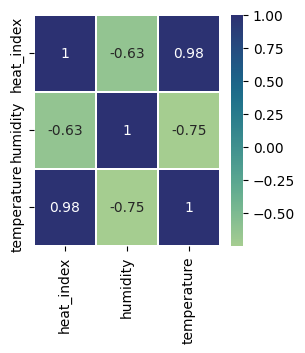

In [160]:
#menampilkan korelasi
plt.figure(figsize=(3,3))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

In [161]:
df.dtypes

heat_index     float64
humidity       float64
temperature    float64
dtype: object

      Melalui fungsi df.dtypes kita tahu bahwa tipe data diatas adalah 3 kolom (float64), 1 kolom (object), 1 kolom (int64).
      
      karena kita akan membangun sebuah machine learning untuk pemodelan SVM. Data pada heat_index tidak dapat digunakan karena memiliki nilai continue, Kita akan membuatnya dalam datatype: object.
      
      kita akan merubah nilai pada heat_index kedalam klasifikasi tabel baru yaitu kolom "label"

      saya membuat klasifikasi dengan keterangan berikut:
      (15, 18.999): "dingin",
      (19, 22.999): "cukup dingin",
      (23, 26.999): "hangat",
      (27, 31)    : "panas",

In [162]:
#membuat kolom baru untuk label dari heat_index
label = {
  (15, 18.999): "dingin",
  (19, 22.999): "cukup dingin",
  (23, 26.999): "hangat",
  (27, 31): "panas",
}
def get_label(Heat_index):
  for rentang, kategori in label.items():
    if rentang[0] <= Heat_index <= rentang[1]:
      return kategori

  return None

df["label"] = df["heat_index"].map(get_label)
df

,heat_index,humidity,temperature,label
0,26.389790,32.400000,26.800000,hangat
3,26.401618,31.916667,26.850000,hangat
4,26.414282,31.716667,26.883333,hangat
5,26.378700,31.600000,26.833333,hangat
6,26.424605,31.716667,26.900000,hangat
...,...,...,...,...
382055,18.921046,55.060000,19.480000,dingin
382669,18.793904,54.087500,19.387500,dingin
383144,19.291956,46.757143,20.014286,cukup dingin
384240,18.429852,41.725000,19.350000,dingin


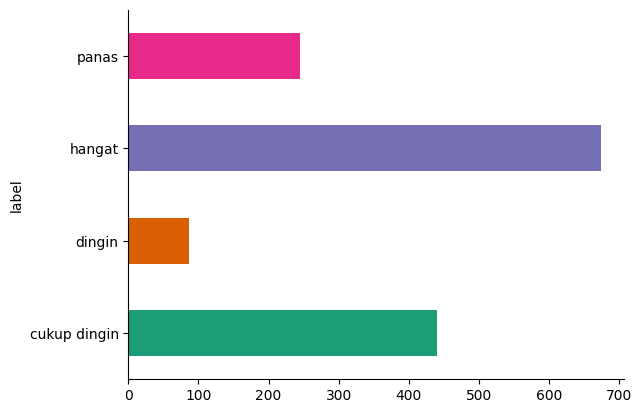

In [163]:
#persebaran data

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

      Untuk pemodelan ANN biasanya dapat digunakan untuk data bertipe numerik
      sehingga saya membuat kolom "label" agar diubah ke kolom "label_numerik"

      Keterangan pada kolom "label_numerik" :
      '0' = cukup dingin
      '1' = dingin
      '2' = hangat
      '3' = panas

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_numerik"] = le.fit_transform(df["label"])
df

,heat_index,humidity,temperature,label,label_numerik
0,26.389790,32.400000,26.800000,hangat,2
3,26.401618,31.916667,26.850000,hangat,2
4,26.414282,31.716667,26.883333,hangat,2
5,26.378700,31.600000,26.833333,hangat,2
6,26.424605,31.716667,26.900000,hangat,2
...,...,...,...,...,...
382055,18.921046,55.060000,19.480000,dingin,1
382669,18.793904,54.087500,19.387500,dingin,1
383144,19.291956,46.757143,20.014286,cukup dingin,0
384240,18.429852,41.725000,19.350000,dingin,1


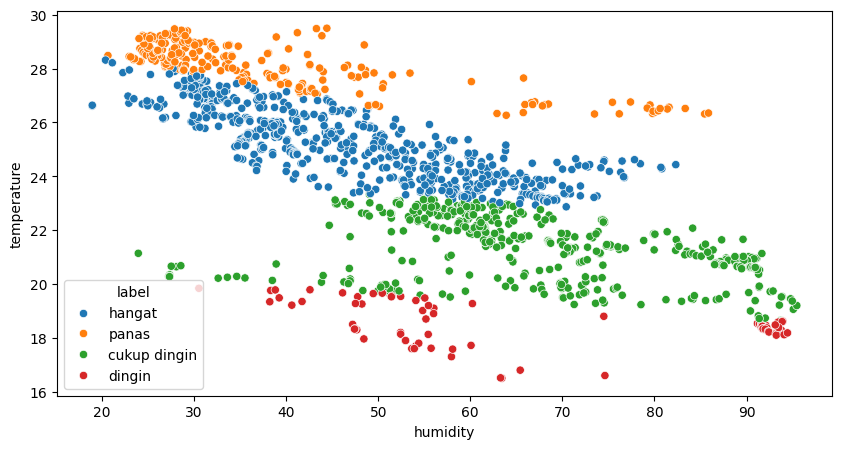

In [165]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='humidity',y='temperature',hue='label',data=df)
plt.show()

In [166]:
#menghitung jumlah data cukup dingin
data_ckpdingin = df.loc[df["label"] == "cukup dingin"]
data_ckpdingin_dihitung = len(data_ckpdingin)
print(f"Jumlah data cukup dingin: {data_ckpdingin_dihitung}")

#menghitung jumlah data dingin
data_dingin = df.loc[df["label"] == "dingin"]
data_dingin_dihitung = len(data_dingin)
print(f"Jumlah data dingin: {data_dingin_dihitung}")

#menghitung jumlah data hangat
data_hangat = df.loc[df["label"] == "hangat"]
data_hangat_dihitung = len(data_hangat)
print(f"Jumlah data hangat: {data_hangat_dihitung}")

#menghitung jumlah data panas
data_panas = df.loc[df["label"] == "panas"]
data_panas_dihitung = len(data_panas)
print(f"Jumlah data panas: {data_panas_dihitung}")


Jumlah data cukup dingin: 440
Jumlah data dingin: 86
Jumlah data hangat: 674
Jumlah data panas: 245


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 385428
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   heat_index     1445 non-null   float64
 1   humidity       1445 non-null   float64
 2   temperature    1445 non-null   float64
 3   label          1445 non-null   object 
 4   label_numerik  1445 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 67.7+ KB


# 5) Split Data

    Untuk SVM


---



In [168]:
from sklearn.model_selection import train_test_split

# Split data
x= df[[ "humidity", "temperature"]]
y= df["label"]

print("x : ", x.shape)
print("y : ", y.shape)


x :  (1445, 2)
y :  (1445,)


In [169]:
scaler =StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [170]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

    untuk ANN


---



In [171]:
#untuk ANN
from sklearn.model_selection import train_test_split

# Split data
a= df[[ "humidity", "temperature"]]
b= df["label_numerik"]

print("a : ", a.shape)
print("b : ", b.shape)

a :  (1445, 2)
b :  (1445,)


In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [173]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 6) Modelling

#*Model SVM*

---



In [174]:
  # Tuning hyperparameter
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["linear", "rbf"]
}

In [175]:
model_svm = SVC()
grid_search = GridSearchCV(model_svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Classification Performance SVM



In [177]:
# Klasifikasi report
y_pred = grid_search.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

cukup dingin       1.00      0.98      0.99        87
      dingin       0.89      1.00      0.94        16
      hangat       1.00      0.99      0.99       136
       panas       0.96      1.00      0.98        50

    accuracy                           0.99       289
   macro avg       0.96      0.99      0.98       289
weighted avg       0.99      0.99      0.99       289



In [178]:
# Akurasi
svm_accuracy = accuracy_score(y_test, y_pred)
print("Akurrasi SVM : {:.2f}%".format (svm_accuracy*100))

Akurrasi SVM : 98.62%


# Confussion Matrix SVM

In [179]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 85   2   0   0]
 [  0  16   0   0]
 [  0   0 134   2]
 [  0   0   0  50]]


# lost Performance SVM

In [180]:
# Los Performance
error_rate = 1 - svm_accuracy

# Format error rate sebagai persen
error_rate_persen = error_rate * 100

# Tampilkan error rate dalam persen
print("Error Rate:", error_rate_persen, "%")

Error Rate: 1.384083044982698 %


# Classification Result SVM

In [181]:
new_data = {'humidity': [31.6],
            'temperature':[26.833333]}
new_data = pd.DataFrame(new_data)
new_data

,humidity,temperature
0,31.6,26.833333


In [182]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = grid_search.predict(scaled_new_data)

print ("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  ['hangat']


# *Model ANN*

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

In [184]:
model = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=42)
model.fit(X_train, Y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), random_state=42,
              solver='lbfgs')

# Classification Performance ANN

In [185]:
Y_pred = model.predict(X_test)
print("Laporan Klasifikasi:\n", classification_report(Y_test, Y_pred))

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.94      1.00      0.97        16
           2       1.00      0.99      0.99       136
           3       0.96      1.00      0.98        50

    accuracy                           0.99       289
   macro avg       0.98      0.99      0.98       289
weighted avg       0.99      0.99      0.99       289



In [186]:
# Hitung dan cetak akurasi
ann_accuracy = accuracy_score(Y_test, Y_pred)
print("Akurrasi ANN : {:.2f}%".format (ann_accuracy*100))

Akurrasi ANN : 98.96%


# Confusion Matrix ANN

In [187]:
print("\nMatriks Konfusion:\n", confusion_matrix(Y_test, Y_pred))


Matriks Konfusion:
 [[ 86   1   0   0]
 [  0  16   0   0]
 [  0   0 134   2]
 [  0   0   0  50]]


# Lost Performance ANN

In [188]:
loss = model.loss_
loss_percent = loss * 100
print(f"Loss Performance: {loss_percent:.2f}%")


Loss Performance: 1.13%


# Klasifikasi Result

In [189]:
Data_Baru = {'humidity': [31.6],
            'temperature':[26.833333]}
Data_Baru = pd.DataFrame(Data_Baru)
Data_Baru

,humidity,temperature
0,31.6,26.833333


In [190]:
scaled_Data_Baru = scaler.transform(Data_Baru)
Y_pred_new = model.predict(scaled_Data_Baru)

print ("Diagnosis Data Baru : ", Y_pred_new)

Diagnosis Data Baru :  [2]


# 7) Perbandingan model

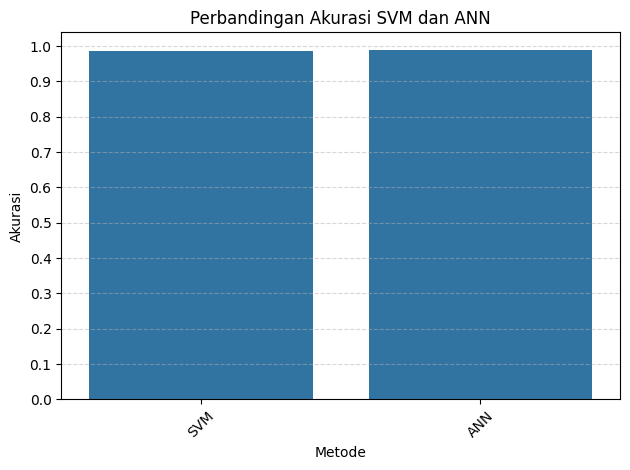

In [191]:
# Buat bar untuk SVM dan ANN
sns.barplot(x=["SVM", "ANN"], y=[svm_accuracy, ann_accuracy])

# Atur label dan judul
plt.xlabel("Metode")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi SVM dan ANN")

# Tambahkan detail
plt.xticks(rotation=45)  # Putar label x-axis
plt.yticks(np.arange(0, 1.1, 0.1))  # Atur tick interval pada y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Tambahkan garis grid pada y-axis
plt.tight_layout()  # Sesuaikan layout agar rapi

# Tampilkan plot
plt.show()



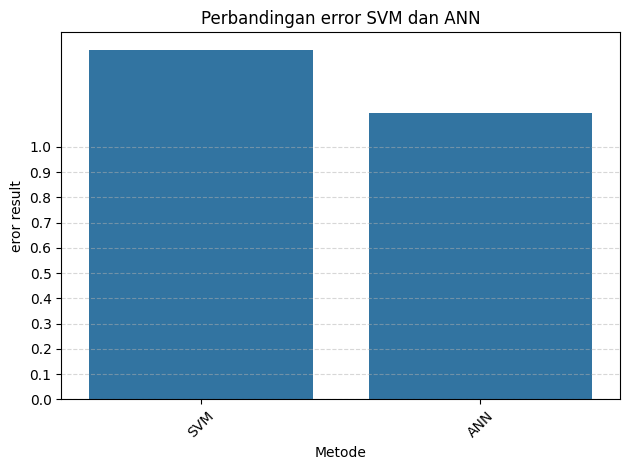

In [192]:
# Buat bar untuk SVM dan ANN
sns.barplot(x=["SVM", "ANN"], y=[error_rate_persen, loss_percent])

# Atur label dan judul
plt.xlabel("Metode")
plt.ylabel("eror result")
plt.title("Perbandingan error SVM dan ANN")

# Tambahkan detail
plt.xticks(rotation=45)  # Putar label x-axis
plt.yticks(np.arange(0, 1.1, 0.1))  # Atur tick interval pada y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Tambahkan garis grid pada y-axis
plt.tight_layout()  # Sesuaikan layout agar rapi

# Tampilkan plot
plt.show()

#8) Kesimpulan

    Pada sebuah dataset IOT sensor, didapatkan bahwa model ANN memiliki
    nilai akurasi dalam analisis klasifikasi heat index yang lebih
    unggul dibanding model SVM yaitu ANN = 98.96% dan SVM= 98.62%. Kemudian
    diketahui juga bahwa korelasi antar masing-masing kolom pada dataframe
    menghasilkan bahwa kolom 'temperature' dengan 'heat_index' memiliki korelasi yang cukup baik.